In [1]:
import matplotlib.pyplot as plt
from money_model import *
import seaborn as sns
import numpy as np
import os
plt.style.use('default')

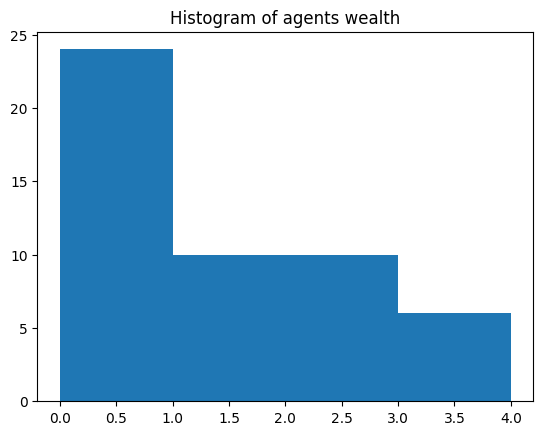

In [5]:
total_wealth = []

for i in range(1):
    # model (agents, width, height)
    model = MoneyModel(50, 10, 10)
    for j in range(100):
        model.step()

    for agent in model.schedule.agents:
        total_wealth.append(agent.wealth)

plt.hist(total_wealth, bins=range(max(total_wealth) + 1))
plt.title('Histogram of agents wealth')
plt.show()

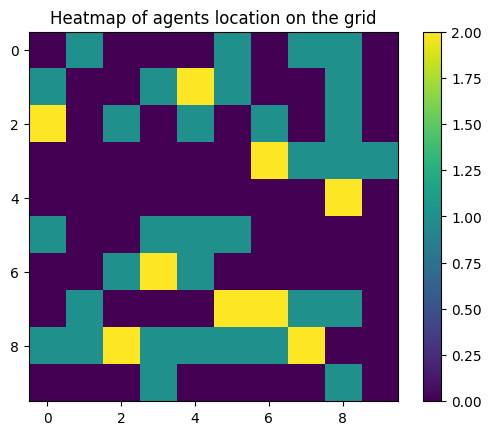

In [6]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, x,y in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of agents location on the grid')
plt.show()

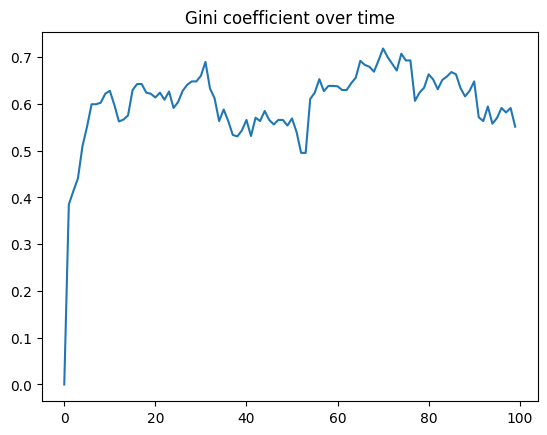

In [7]:
gini = model.datacollector.get_model_vars_dataframe()
plt.plot(gini)
plt.title('Gini coefficient over time')
plt.show()

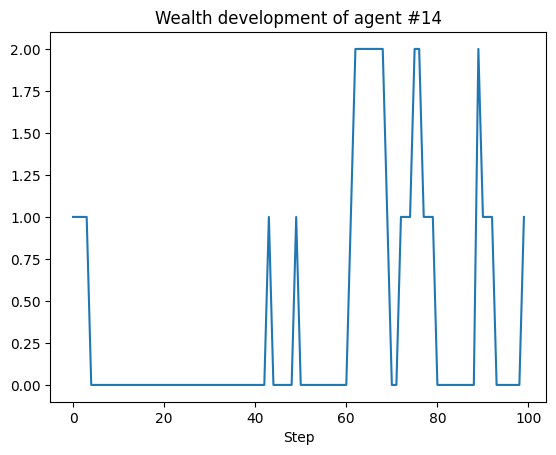

In [8]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
nr = 14
a_wealth = agent_wealth.xs(nr,level='AgentID')
a_wealth.Wealth.plot()
plt.title(f'Wealth development of agent #{nr}')
plt.show()